# Using the model server to do an inference using REST

## First, make sure we have the libraries we need
Have a look at requirements.txt to see which libraries are used. You can ignore compatibility errors if any when doing the import.

In [1]:
!pip install -qr requirements.txt

# Only if you don't have torch installed
#!pip install -q -r requirements-torch-cpu.txt


[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


## Import the libraries and module where we have all helper code for doing the inference

In [2]:
import cv2
from matplotlib import pyplot as plt
from PIL import Image

from remote_infer_rest import ort_v5

## Enter the inference URL, the model name, the YAML file with your classes

In [3]:
infer_url = 'http://modelmesh-serving.project-name.svc.cluster.local:8008/v2/models/yolo/infer'
# Example with an external route: infer_url = 'https://yolo-project-name.apps.rhods-internal.61tk.p1.openshiftapps.com/v2/models/yolo/infer'
model_name = 'yolo'
classes_file = 'coco.yaml'

## Now set the parameters for the inference

In [4]:
# 1. The image you want to analyze
image_path='images/zidane.jpg' # You can replace this with an image you upload
#image_path='images/bus.jpg' 

# 2. Confidence threshold, between 0 and 1 (detections with less score won't be retained)
conf = 0.2

# 3. Intersection over Union Threshold, between 0 and 1 (cleanup overlapping boxes)
iou = 0.6

## Launch the inference and show the result

images/zidane.jpg processed in 2.88 seconds, inference time 2.32 seconds
Predictions:
tensor([[3.5752e+02, 1.5877e+02, 5.8449e+02, 4.9518e+02, 3.8260e-01, 0.0000e+00],
        [7.1869e+01, 2.3494e+02, 3.6900e+02, 5.0246e+02, 2.1574e-01, 0.0000e+00],
        [2.0118e+02, 3.5403e+02, 2.6172e+02, 4.9749e+02, 2.1179e-01, 2.7000e+01]],
       dtype=torch.float64)
Format: each detection is a float64 array shaped as [top_left_corner_x, top_left_corner_y, bottom_right_corner_x, bottom_right_corner_y, confidence, class_index]


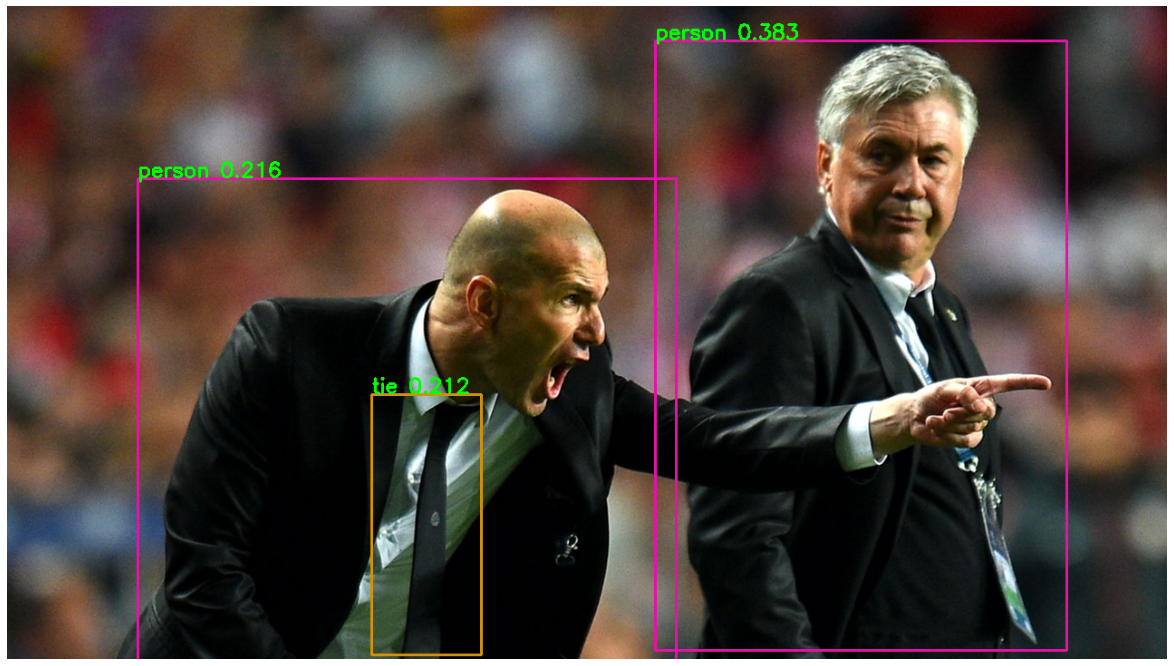

In [5]:
infer=ort_v5(image_path, infer_url, conf, iou, 640, classes_file)
img, out, result = infer()
print(f'{result}')
print('Predictions:')
print(out)
print('Format: each detection is a float64 array shaped as [top_left_corner_x, top_left_corner_y, bottom_right_corner_x, bottom_right_corner_y, confidence, class_index]')
print('The coordinates are relative to a letterboxed representation of the image of size 640x640')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.gcf()
fig.set_size_inches(24, 12)
plt.axis('off')
plt.imshow(img);

## Time it on multiple images!

In [6]:
import os
import time

folder_path = 'images'

start_time = time.time()

# Iterate over all files in the folder
for filename in os.listdir(folder_path):
    # Get the full path of the file
    file_path = os.path.join(folder_path, filename)

    # Check if the file path is a file (not a directory)
    if os.path.isfile(file_path):
        # Do the inference on the file
        infer=ort_v5(file_path, infer_url, conf, iou, 640, classes_file)
        img, out, result = infer()
        print(f'{result}')

end_time = time.time()
execution_time = end_time - start_time
print(f"Executed in {execution_time:.2f} seconds")

images/bus.jpg processed in 2.70 seconds, inference time 2.22 seconds
images/06f729e89c76c004_jpg.rf.4127f90cb5fc0040b545a0cba49c0dd7.jpg processed in 2.75 seconds, inference time 2.22 seconds
images/0635078ebd98c7aa_jpg.rf.3849f679b8ada9e8a0ed0decb0e6d034.jpg processed in 2.64 seconds, inference time 2.17 seconds
images/0348459ccf6e2746_jpg.rf.234d5950ca3bd6de421ee6c8c2dbf204.jpg processed in 2.75 seconds, inference time 2.22 seconds
images/01bce5b2dd400f5d_jpg.rf.4a3fbe55914fbb7a8491935e39e63c1b.jpg processed in 2.75 seconds, inference time 2.24 seconds
images/029e44f5c186d518_jpg.rf.761691070193ef08cfa53ab14374d5f8.jpg processed in 2.75 seconds, inference time 2.23 seconds
images/069412369a393aa0_jpg.rf.2e162b8f348d11d8f33adb5ffec51f9e.jpg processed in 2.74 seconds, inference time 2.22 seconds
images/056c3e43bad4d5f9_jpg.rf.9cdabc97d588216c6a0c633089b5e3fc.jpg processed in 2.75 seconds, inference time 2.23 seconds
images/08d644aa5be91b44_jpg.rf.4dcf8c40712878d2794102541696357c.jpg p